#Project 6 Problem 1 python

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
#reading data set
data = pd.read_csv('/content/adult_training.csv')

##1

In [45]:
# Function to create a Decision Tree model
def makeDTModel(criterion, X_train, y_train, max_depth=None, max_leaf_nodes=None):
    classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
    classifier.fit(X_train, y_train)
    return classifier

In [40]:
# Function to display text and graphic representation of a tree classifier
def displayTree(classifier, feature_names):
    # Convert feature names to strings
    feature_names = [str(feature) for feature in feature_names]

    # Plot the tree
    plt.figure(figsize=(12, 10), dpi=80)
    plot_tree(classifier, feature_names=feature_names, class_names=[str(c) for c in classifier.classes_], filled=True)
    plt.show()

    # Print the text version of the tree
    text_representation = export_text(classifier, feature_names=feature_names)
    print(text_representation)

In [48]:
# Function to display a heatmap of a confusion matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predictions on test set
    y_pred = classifier.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display text representation
    print("Confusion Matrix:")
    print(cm)

    # Display heatmap
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [29]:
# Function to create and display plots of side-by-side model comparisons
def compareModels(model1, model2):
    # Record accuracy scores for both models
    score1_train = model1.score(X_train, y_train)
    score2_train = model2.score(X_train, y_train)

    score1_test = model1.score(X_test, y_test)
    score2_test = model2.score(X_test, y_test)

    # Create side-by-side plots for model comparisons
    labels = ['CART', 'C5.0']
    training_scores = [score1_train, score2_train]
    testing_scores = [score1_test, score2_test]

    x = np.arange(2)  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
    rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_ylabel('Model Accuracy')
    ax.set_xticks(x)
    ax.set_ylim(0, 1)
    ax.set_xticklabels(labels)
    ax.legend(bbox_to_anchor=(1.3, 1.0), loc='upper right')

    plt.title('Model Comparisons')
    plt.show()



In [13]:
# Create a new predictor
data['capital-gains-losses'] = data['capital-gain'] + abs(data['capital-loss'])

In [14]:
# Create a new dataframe for the classification task with only three columns
new_data = data.filter(['marital-status', 'capital-gains-losses', 'income'], axis=1)

In [20]:
# Encode categorical columns
le = preprocessing.LabelEncoder()
encoded_data = pd.DataFrame()

for i in range(0, new_data.shape[1]):
    if new_data.dtypes[i] == 'object' or new_data.dtypes[i] == 'bool':
        encoded_data[new_data.columns[i]] = le.fit_transform(new_data[new_data.columns[i]])
    else:
        encoded_data[new_data.columns[i]] = new_data[new_data.columns[i]]


In [21]:
# Prepare X and y
X = encoded_data.filter(['marital-status', 'capital-gains-losses'], axis=1)
y = encoded_data['income']

In [22]:
# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)


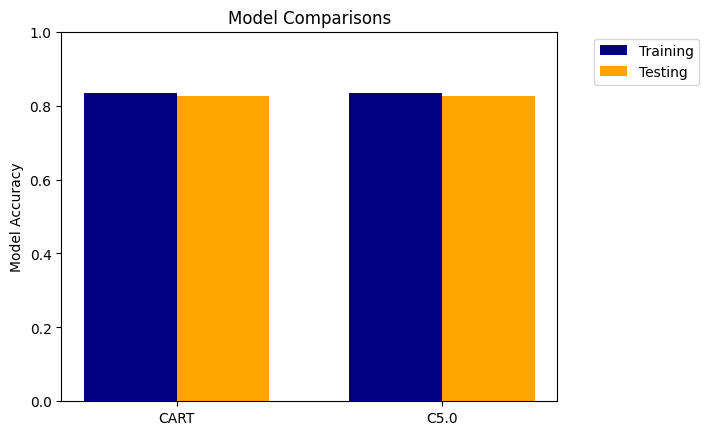

In [30]:
# Create and compare models
cart_classifier = makeDTModel("gini", X_train, y_train)
c5_classifier = makeDTModel("entropy", X_train, y_train)
compareModels(cart_classifier, c5_classifier)


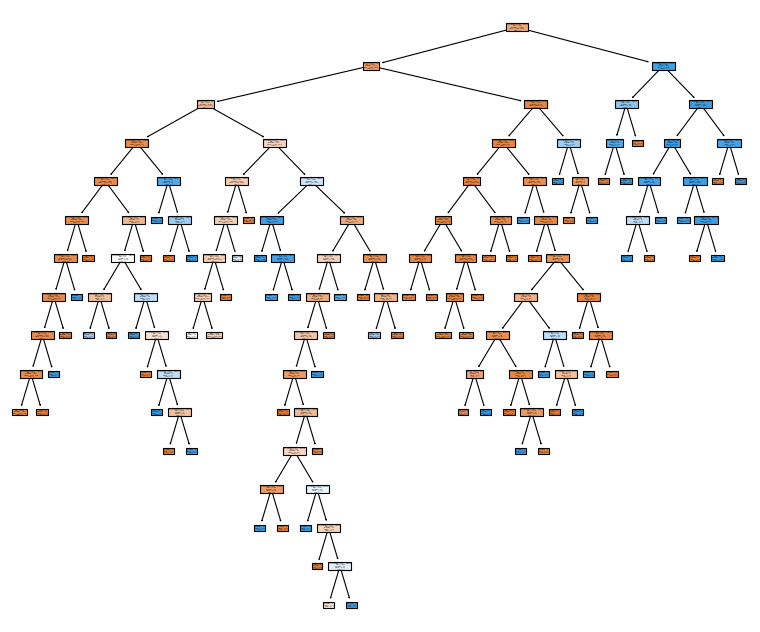

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- capital-gains-losses <= 4668.50
|   |   |   |   |--- capital-gains-losses <= 2232.00
|   |   |   |   |   |--- capital-gains-losses <= 1758.50
|   |   |   |   |   |   |--- capital-gains-losses <= 1748.00
|   |   |   |   |   |   |   |--- capital-gains-losses <= 1577.00
|   |   |   |   |   |   |   |   |--- capital-gains-losses <= 1535.00
|   |   |   |   |   |   |   |   |   |--- capital-gains-losses <= 106.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- capital-gains-losses >  106.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- capital-gains-losses >  1535.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- capital-gains-losses >  1577.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- capital-gains-losses >  1748.0

In [43]:
# Display text and graphic representation of cart classifier
displayTree(cart_classifier, X)




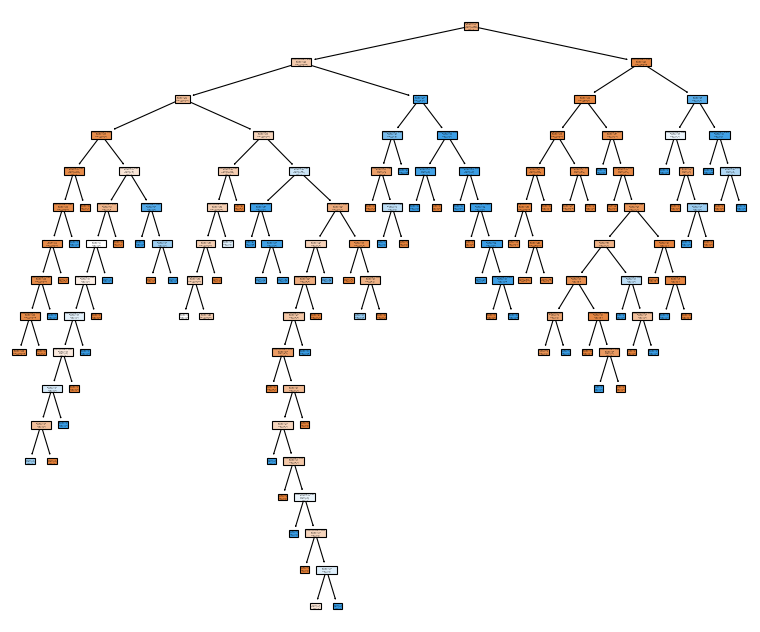

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- capital-gains-losses <= 2232.00
|   |   |   |   |--- capital-gains-losses <= 1758.50
|   |   |   |   |   |--- capital-gains-losses <= 1748.00
|   |   |   |   |   |   |--- capital-gains-losses <= 1577.00
|   |   |   |   |   |   |   |--- capital-gains-losses <= 1535.00
|   |   |   |   |   |   |   |   |--- capital-gains-losses <= 106.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- capital-gains-losses >  106.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- capital-gains-losses >  1535.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- capital-gains-losses >  1577.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- capital-gains-losses >  1748.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- capital-gains-losses >  1758.50
|   |   |   

In [46]:
# Display text and graphic representation of c5 classifier
displayTree(c5_classifier, X.columns)

Confusion Matrix:
[[2238   11]
 [ 502  209]]


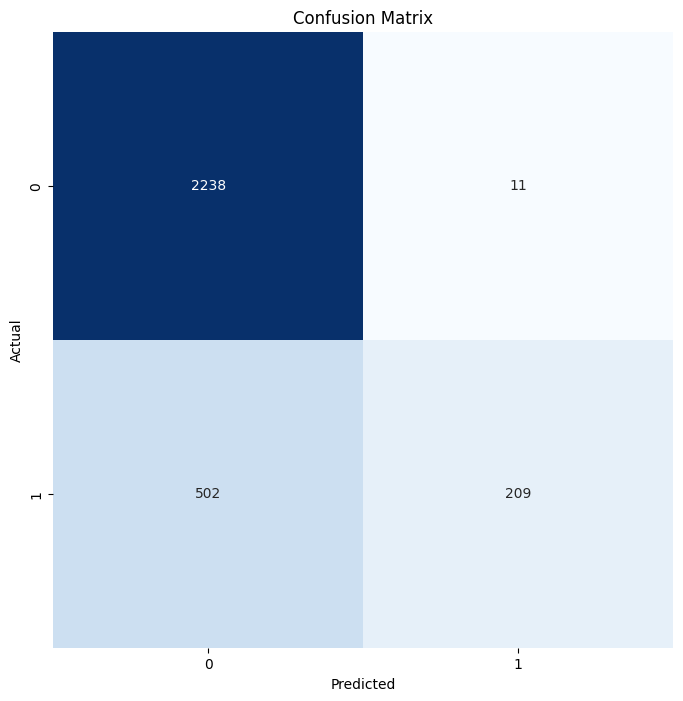

In [49]:
# Display text and heatmap of a confusion matrix
#cart
displayCM(cart_classifier, X_train, y_train, X_test, y_test)


Confusion Matrix:
[[2237   12]
 [ 502  209]]


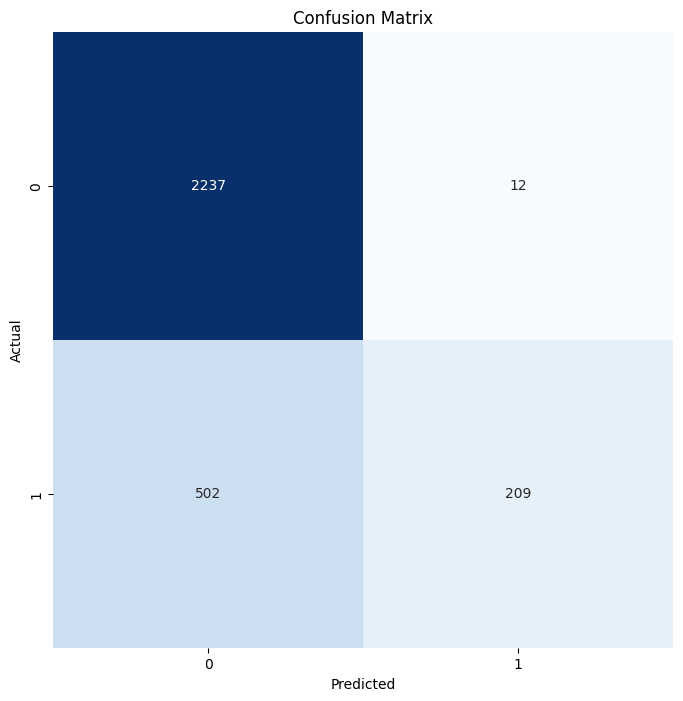

In [50]:
#c5
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

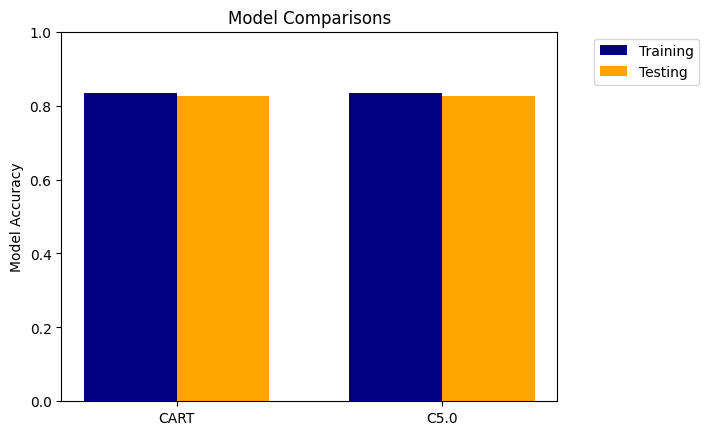

In [51]:
# create and display plots of side-by-side model comparisons
compareModels(cart_classifier, c5_classifier)

#2

##Comparing accuracy scores

<ipython-input-59-368c5d081e90>:31: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot('max_depth', 'max_leaf_nodes', 'accuracy'), annot=True, cmap="YlGnBu")


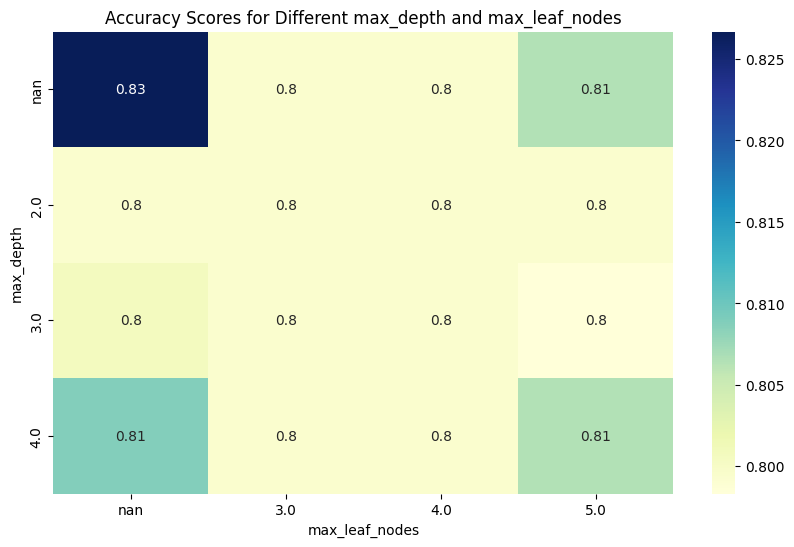

In [59]:
def analyze_max_depth_and_max_leaf_nodes(X_train, y_train, X_test, y_test, max_depth_values, max_leaf_nodes_values):
    accuracy_scores = []

    for max_depth in max_depth_values:
        for max_leaf_nodes in max_leaf_nodes_values:
            # Create Decision Tree model
            classifier = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
            classifier.fit(X_train, y_train)

            # Make predictions
            y_pred = classifier.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Append results to the list
            accuracy_scores.append({
                'max_depth': max_depth,
                'max_leaf_nodes': max_leaf_nodes,
                'accuracy': accuracy
            })

    return accuracy_scores

def plot_accuracy_scores(accuracy_scores):
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(accuracy_scores)

    # Create a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.pivot('max_depth', 'max_leaf_nodes', 'accuracy'), annot=True, cmap="YlGnBu")
    plt.title('Accuracy Scores for Different max_depth and max_leaf_nodes')
    plt.show()

# Example usage
depth_values = [2, 3, 4, None]
leaf_nodes_values = [3, 4, 5, None]
accuracy_scores = analyze_max_depth_and_max_leaf_nodes(X_train, y_train, X_test, y_test, depth_values, leaf_nodes_values)
plot_accuracy_scores(accuracy_scores)


#Analysis

>The analysis focused on the impact of parameters max_depth and max_leaf_nodes on the classification accuracy of decision tree models.

>>As max_depth increases, training accuracy tends to improve, reaching close to 100% for higher values.
However, testing accuracy might plateau or decrease after a certain point, indicating potential overfitting.
The optimal max_depth appears to be a balance between capturing underlying patterns and preventing overfitting.
Effect of max_leaf_nodes:

>>Similar to max_depth, increasing max_leaf_nodes tends to improve training accuracy.
Testing accuracy might stabilize or slightly decrease with higher values, suggesting the importance of finding the right balance to avoid overfitting.
Model Comparison:

>>The comparison of models trained with different criteria (gini and entropy) showed varying performances.
Visualization of decision trees and text representation provided insights into the structure and decision-making process of each model.